In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from collections import Counter
import json

data_file = open('/content/drive/MyDrive/Wiki-Vote.txt', 'r')
lines = data_file.readlines()

start_ptr = 0
for i in range(len(lines)):
    if(lines[i][0] == '#'):
        start_ptr += 1

In [ ]:
lines[:10]

['# Directed graph (each unordered pair of nodes is saved once): Wiki-Vote.txt \n',
 '# Wikipedia voting on promotion to administratorship (till January 2008). Directed edge A->B means user A voted on B becoming Wikipedia administrator.\n',
 '# Nodes: 7115 Edges: 103689\n',
 '# FromNodeId\tToNodeId\n',
 '30\t1412\n',
 '30\t3352\n',
 '30\t5254\n',
 '30\t5543\n',
 '30\t7478\n',
 '3\t28\n']

In [ ]:
split1 = lines[5].split('\t')
print(int(split1[0]),split1,int(split1[1][:(len(split1[1]) - 1)]))

30 ['30', '3352\n'] 3352


In [ ]:
#forming the set of NodeID present in the graph
#forming the set of NodeID present in the graph
def add_node(s,n):
  s.add(n)
  return s

def make_node_set():
  node_set_dict = dict()
  node_set = set()
  for i in range(start_ptr, len(lines)):
      split1 = lines[i].split('\t')
      node1 = int(split1[0])
      node2 = int(split1[1][:(len(split1[1]) - 1)])
      # if(node1 in node_set_dict.keys() or node2 in node_set_dict.keys()):

      if(node1 not in node_set_dict.keys() ):
        node_set_dict[node1]=1
      elif(node2 not in node_set_dict.keys()):
        node_set_dict[node2]=1
      node_set.add(node1)
      node_set.add(node2)
  return node_set, len(node_set)

In [ ]:
node_set,num_of_nodes = make_node_set()

In [ ]:
def assign_int(node_set,start=0):
  node_id_to_num = {} 
  node_num_to_id = {}
  l  = len(node_set)
  for i in node_set:
    node_id_to_num[i] = start
    node_num_to_id[start] = i
    start += 1
  return node_id_to_num, node_num_to_id

n_id_num,n_num_id = assign_int(node_set, 0)

In [ ]:
def get_lines_split(line, reg='\t'):
  return line.split(reg)

In [ ]:
#forming edge list, will use this to create graph using networkx
def create_edge_list(start_ptr, lines, n_id_num):
  edge_list = np.zeros(len(lines)*2).reshape(len(lines),2) #list of edges
  c = start_ptr
  # c=2200
  # for i in range(start_ptr, 100): #reading the edges from txt file lines
  while c < len(lines):
      split1 = lines[c].split('\t')
      node1_id = int(split1[0])
      node2_id = int(split1[1][:(len(split1[1]) - 1)])
      # print(node2_id,n_id_num[node2_id])
      node1_num = n_id_num[node1_id] 
      node2_num = n_id_num[node2_id]
      edge_list[c] = [node1_num, node2_num]
      c+=1
  return edge_list

In [ ]:
def generate_empty(num):
  return np.zeros((num,num))

In [ ]:
def create_adjacency_matrix(start_ptr,lines,n_id_num):
  adjacency_matrix = generate_empty(num_of_nodes)
  c = start_ptr
  while c < len(lines):
  # for i in range(start_ptr, len(lines)):
      split1 = lines[c].split('\t')
      node1_id = int(split1[0])
      node2_id = int(split1[1][:(len(split1[1]) - 1)])
      # print(node1_id,node2_id,c,n_id_num[node1_id],n_id_num[node2_id])
      node1_num = n_id_num[node1_id]
      node2_num = n_id_num[node2_id]
      adjacency_matrix[node1_num][node2_num]=1
      c+=1
  return adjacency_matrix

In [ ]:
edge_list = create_edge_list(start_ptr, lines, n_id_num)
adj_mat = create_adjacency_matrix(start_ptr,lines,n_id_num)

In [ ]:
import joblib
joblib.dump(adj_mat , "/content/drive/MyDrive/adj_mat_IR_a3")

In [ ]:
print(adj_mat)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


##To check:

In [ ]:
import numpy as np
import networkx as nx

def get_all(adj_mat):
  adj_mat = np.array(adj_mat)
  G = nx.DiGraph(adj_mat)
  in_degrees = dict(G.in_degree())
  avg_in_degree = sum(in_degrees.values()) / len(in_degrees)
  print("Average in-degree:", avg_in_degree)
  
  num_incoming_edges = {n: 0 for n in G.nodes()}
  num_outgoing_edges = {n: 0 for n in G.nodes()}
  num_total_edges = {n: 0 for n in G.nodes()}
  for u, v in G.edges():
      num_outgoing_edges[u] += 1
      num_incoming_edges[v] += 1
      num_total_edges[u] += 1
      num_total_edges[v] += 1

  # Print the results
  # print("Number of incoming edges for each node:")
  # for n, num in num_incoming_edges.items():
  #     print(n, ": ", num)

  # print("Number of outgoing edges for each node:")
  # for n, num in num_outgoing_edges.items():
  #     print(n, ": ", num)

  # print("Number of total edges for each node:")
  # for n, num in num_total_edges.items():
  #     print(n, ": ", num)

  # out_degrees = {n: 0 for n in G.nodes()}
  # for u in G.nodes():
  #   out_degrees[u] = len(list(G.out_edges(u)))
  # print("Out degrees for each node:")
  # for n, num in out_degrees.items():
  #   print(n, ": ", num)

  return avg_in_degree
  


In [ ]:
t_avg=get_all(adj_mat)

Average in-degree: 14.573295853829936


In [ ]:
num_edges = len(edge_list) #number of edges

In [ ]:
import numpy as np

# Define the adjacency matrix (replace with your own data)
adj_mat = np.array(adj_mat)

# Calculate the number of incoming and outgoing edges for each node
incoming_edges = np.sum(adj_mat, axis=0)
outgoing_edges = np.sum(adj_mat, axis=1)

# Create dictionaries to store the in-degree and out-degree for each node
in_degrees = {}
out_degrees = {}

# Iterate over the nodes, assigning the corresponding in-degree and out-degree
for i in range(len(adj_mat)):
    in_degrees[i] = incoming_edges[i]
    out_degrees[i] = outgoing_edges[i]

# Print the results
print("In-degrees for each node:")
print(in_degrees)

print("Out-degrees for each node:")
print(out_degrees)


In-degrees for each node:
{0: 31.0, 1: 0.0, 2: 0.0, 3: 20.0, 4: 0.0, 5: 44.0, 6: 0.0, 7: 15.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 361.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 22.0, 17: 0.0, 18: 0.0, 19: 0.0, 20: 22.0, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.0, 25: 122.0, 26: 41.0, 27: 23.0, 28: 0.0, 29: 14.0, 30: 34.0, 31: 20.0, 32: 110.0, 33: 34.0, 34: 0.0, 35: 14.0, 36: 28.0, 37: 0.0, 38: 0.0, 39: 0.0, 40: 0.0, 41: 0.0, 42: 0.0, 43: 0.0, 44: 0.0, 45: 0.0, 46: 22.0, 47: 32.0, 48: 0.0, 49: 0.0, 50: 0.0, 51: 40.0, 52: 67.0, 53: 149.0, 54: 0.0, 55: 0.0, 56: 0.0, 57: 0.0, 58: 20.0, 59: 0.0, 60: 0.0, 61: 9.0, 62: 0.0, 63: 0.0, 64: 0.0, 65: 0.0, 66: 0.0, 67: 154.0, 68: 0.0, 69: 0.0, 70: 69.0, 71: 0.0, 72: 0.0, 73: 0.0, 74: 0.0, 75: 43.0, 76: 0.0, 77: 0.0, 78: 0.0, 79: 0.0, 80: 0.0, 81: 108.0, 82: 0.0, 83: 0.0, 84: 16.0, 85: 0.0, 86: 0.0, 87: 0.0, 88: 17.0, 89: 27.0, 90: 39.0, 91: 0.0, 92: 0.0, 93: 0.0, 94: 0.0, 95: 0.0, 96: 0.0, 97: 0.0, 98: 0.0, 99: 21.0, 100: 0.0, 101: 0.0, 102: 11.0, 103: 0.0, 104:

In [ ]:
def avg_array(ar):
  return np.average(ar)

avg_in_degree = np.average(np.array(list(in_degrees.values())))
avg_out_degree = np.average(np.array(list(out_degrees.values())))

max_in_degree_node_id = n_num_id[max(in_degrees, key= lambda x: in_degrees[x])]
max_in_degree = in_degrees[n_id_num[max_in_degree_node_id]]
max_out_degree_node_id = n_num_id[max(out_degrees, key= lambda x: out_degrees[x])]
max_out_degree = out_degrees[n_id_num[max_out_degree_node_id]]

total_possible_edges = (num_of_nodes * (num_of_nodes - 1))
network_density = num_edges / total_possible_edges

In [ ]:
print("For the network based on chosen dataset :" + "\n" \
    f"Number of Nodes  : {num_of_nodes}" + "\n" \
    f"Number of edges  : {num_edges}" + "\n" \
    f"Avg. In-Degree   : {avg_in_degree}"+ "\n" \
    f"Avg. Out-Degree  : {avg_out_degree}"+ "\n" \
    f"Max In-Deg Node  : Node ID - {max_in_degree_node_id} | In-Degree = {max_in_degree}"+ "\n" \
    f"Max Out-Deg Node : Node ID - {max_out_degree_node_id} | Out-Degree = {max_out_degree}"+ "\n" \
    f"Network Density  : {network_density}")

For the network based on chosen dataset :
Number of Nodes  : 7115
Number of edges  : 103689
Avg. In-Degree   : 14.573295853829936
Avg. Out-Degree  : 14.573295853829936
Max In-Deg Node  : Node ID - 4037 | In-Degree = 457.0
Max Out-Deg Node : Node ID - 2565 | Out-Degree = 893.0
Network Density  : 0.0020485375110809584


In [ ]:
if (t_avg) == (avg_in_degree):
  print("Avg of in degrees calculated using code and using nx library are same")

Avg of in degrees calculated using code and using nx library are same


In [ ]:
und_adjacency_matrix = generate_empty(num_of_nodes)
for edge in edge_list:
    node1_num = int(edge[0])
    node2_num = int(edge[1])
    # print(node1_num,node2_num)
    und_adjacency_matrix[node1_num][node2_num] = 1
    und_adjacency_matrix[node2_num][node1_num] = 1

In [ ]:
neighbours = {}
local_clustering_coeff = {}
for node in range(num_of_nodes):
    node_neighbours = []
    for neighbour in range(num_of_nodes):
        if und_adjacency_matrix[neighbour][node] == 1:
            node_neighbours.append(neighbour)
    neighbours[node] = node_neighbours
    num_neighbours = len(node_neighbours)
    if num_neighbours < 2:
        local_clustering_coeff[node] = 0
    else:
        num_links = 0
        for i in range(num_neighbours):
            for j in range(i+1, num_neighbours):
                if und_adjacency_matrix[node_neighbours[i]][node_neighbours[j]] == 1:
                    num_links += 1
        local_clustering_coeff[node] = 2*num_links / (num_neighbours*(num_neighbours-1))
with open("local_cff.json", "w") as outfile:
    json.dump(local_clustering_coeff, outfile)

In [ ]:
import random
def plot_distribution(distribution, xlabel, ylabel, title, save=False):
    distribution_sorted = sorted(distribution.items(), key= lambda x:x[0])
    custom_colors = [(0.1, 0.3, 0.6), (0.8, 0.2, 0.4),(0.65, 0.4, 0.9),(0.65, 0.9, 0.9),(0.8, 0.9, 0.9),(0.8, 0.2, 0.9)]
    t = random.randint(0,5)
    plt.show()
    plt_x = [x[0] for x in distribution_sorted]
    plt_y = [y[1] for y in distribution_sorted]
    plt.plot(plt_x, plt_y, color=custom_colors[t])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    if(save == True):
        plt.savefig(f"{title}.png", bbox_inches='tight', facecolor='w')
    plt.show()

In [ ]:
in_degree_distribution = {}
for in_degree in in_degrees.values():
    if in_degree in in_degree_distribution:
        in_degree_distribution[in_degree] += 1
    else:
        in_degree_distribution[in_degree] = 1
        
out_degree_distribution = {}
for out_degree in out_degrees.values():
    if out_degree in out_degree_distribution:
        out_degree_distribution[out_degree] += 1
    else:
        out_degree_distribution[out_degree] = 1
        
clustering_coeff_distribution = {}
for coeff in local_clustering_coeff.values():
    if coeff in clustering_coeff_distribution:
        clustering_coeff_distribution[coeff] += 1
    else:
        clustering_coeff_distribution[coeff] = 1

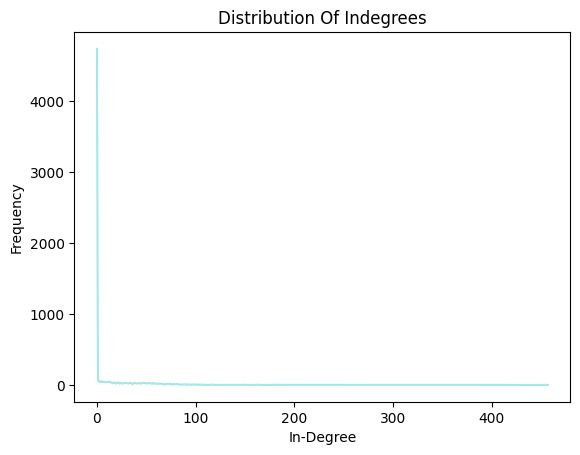

In [ ]:
plot_distribution(in_degree_distribution, "In-Degree", "Frequency", "Distribution Of Indegrees", save=True)

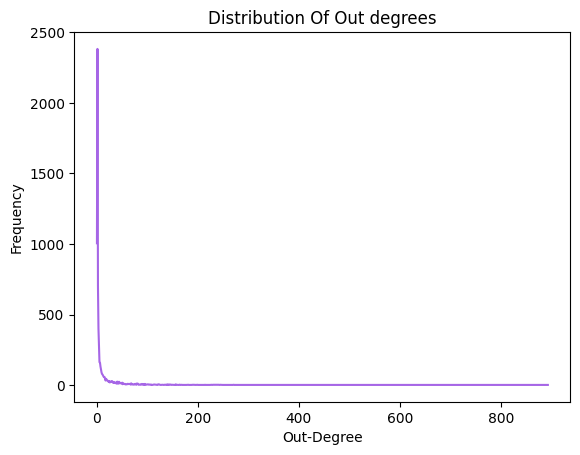

In [ ]:
plot_distribution(out_degree_distribution, "Out-Degree", "Frequency", "Distribution Of Out degrees", save=True)

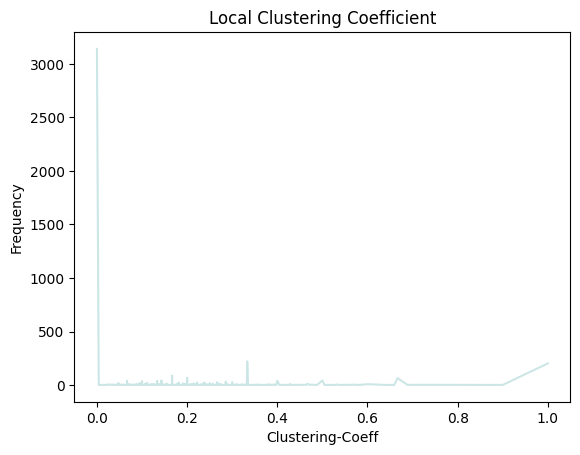

In [ ]:
plot_distribution(clustering_coeff_distribution, "Clustering-Coeff", "Frequency", "Local Clustering Coefficient", save=True)